# **ANN with CALLBACK Function**
---
---
## **Hand Written Digit Prediction**

**Import Libraries**

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

**Checking versions of tensorflow and keras**

In [3]:
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


**Checking current working directory**

In [4]:
os.getcwd()

'/content'

# **Check GPU/CPU**

In [5]:
tf.config.list_physical_devices("GPU")

[]

In [6]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
check_list = ['GPU','CPU']

for devices in check_list:
  out = tf.config.list_physical_devices(devices)
  if len(out)>0:
    print(f"{devices} is available!")
    print(f"details {out}")

  else:
    print(f"{devices} is not available!")


GPU is not available!
CPU is available!
details [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## **Creating a simple Classifier using keras on MNIST data**

In [8]:
# Load the data

mnist = tf.keras.datasets.mnist

In [9]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

## **Split the Data**

In [10]:
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
# Create validation dataset from the full training data
X_valid, X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]


# Scale the test set as well
X_test = X_test/255.

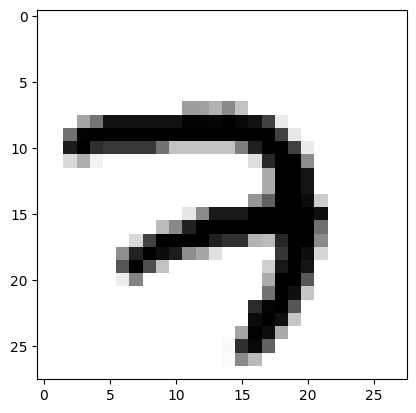

In [14]:
# Lets view some data

plt.imshow(X_train[0], cmap='binary')
plt.show()

<Axes: >

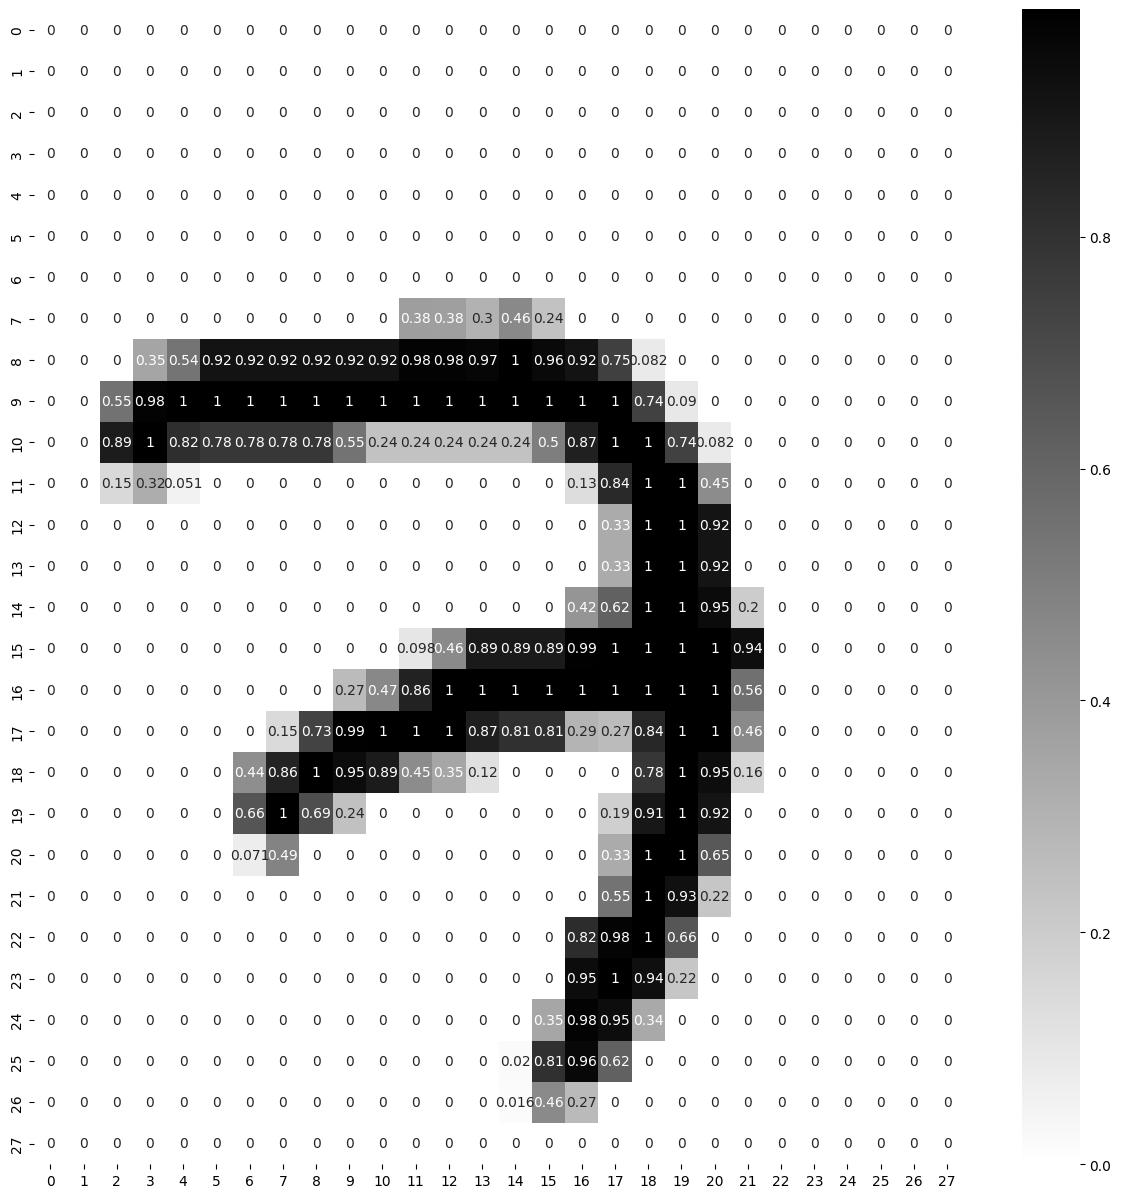

In [15]:
plt.figure(figsize = (15,15))
sns.heatmap(X_train[0], annot = True, cmap="binary")

## **Defining Neural Network Model**

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [17]:
model = Sequential()

# Hidden Layer
model.add(Flatten(input_shape = [28,28],name = "InputLayer"))


model.add(Dense(300, activation = "relu", name = "HiddenLayer1"))
model.add(Dense(100, activation = "relu", name = "HiddenLayer2"))

# Output Layer
model.add(Dense(10, activation = "softmax", name = "OutputLayer"))

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compliling our Model
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


## **Tensorboard callback Functions**

**LOGGING**

In [21]:
import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path



**TensorBoard CallBack**

In [22]:
log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2023_08_29_15_50_09


**Early Stopping callback**

In [23]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

**Model checkpointing callback**

In [24]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [25]:
model.fit(X_train, y_train,
          epochs = 30,
          validation_data = [X_valid, y_valid],
          batch_size = 32,
          callbacks=[tb_cb, early_stopping_cb,checkpointing_cb])

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5992 - accuracy: 0.8468 - val_loss: 0.3186 - val_accuracy: 0.9132
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2878 - accuracy: 0.9186 - val_loss: 0.2412 - val_accuracy: 0.9354
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2361 - accuracy: 0.9331 - val_loss: 0.2028 - val_accuracy: 0.9442
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2010 - accuracy: 0.9430 - val_loss: 0.1826 - val_accuracy: 0.9482
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1748 - accuracy: 0.9503 - val_loss: 0.1616 - val_accuracy: 0.9548
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1547 - accuracy: 0.9556 - val_loss: 0.1479 - val_accuracy: 0.9594
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1390 - accuracy: 0.9609 - val_loss: 0.1326 - val_accuracy:

In [26]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.599223,0.846836,0.318626,0.9132
1,0.287813,0.918582,0.241197,0.9354
2,0.236138,0.933055,0.202783,0.9442
3,0.201023,0.943036,0.182623,0.9482
4,0.174819,0.950345,0.161607,0.9548
5,0.154734,0.955618,0.147940,0.9594
6,0.138980,0.960927,0.132584,0.9620
7,0.126086,0.963964,0.125905,0.9656
8,0.114692,0.968073,0.119565,0.9648
9,0.105445,0.970855,0.109592,0.9692


<Axes: >

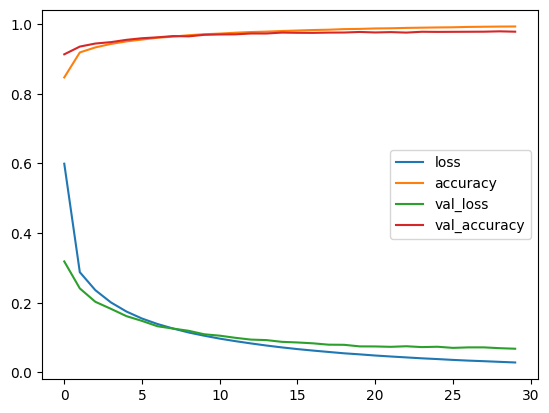

In [27]:
pd.DataFrame(model.history.history).plot()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9786


[0.07116646319627762, 0.978600025177002]

## **SAMPLE Prediction**

In [29]:
X_new = X_test[:3]

In [30]:
y_new = y_test[:3]

In [31]:
y_new

array([7, 2, 1], dtype=uint8)

In [32]:
y_prob = model.predict(X_new)

1/1 [==============================] - 0s 102ms/step


In [33]:
y_prob

array([[3.9116744e-06, 2.2492522e-08, 1.5934325e-04, 1.1311214e-04,
        1.0718733e-08, 8.6464121e-07, 2.5692568e-11, 9.9970406e-01,
        1.8970954e-06, 1.6796561e-05],
       [7.9340310e-08, 1.9104448e-06, 9.9999070e-01, 5.2416799e-06,
        4.6927973e-14, 3.9074258e-08, 2.8846898e-07, 8.6517772e-11,
        1.7793636e-06, 5.7797891e-13],
       [7.0357864e-06, 9.9595588e-01, 5.5428874e-04, 1.2842663e-04,
        4.2960630e-04, 6.0069862e-05, 3.0748657e-04, 7.8021345e-04,
        1.7217856e-03, 5.5261316e-05]], dtype=float32)

In [34]:
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.996, 0.001, 0.   , 0.   , 0.   , 0.   , 0.001, 0.002,
        0.   ]], dtype=float32)

In [35]:
y_pred = np.argmax(y_prob, axis = -1)

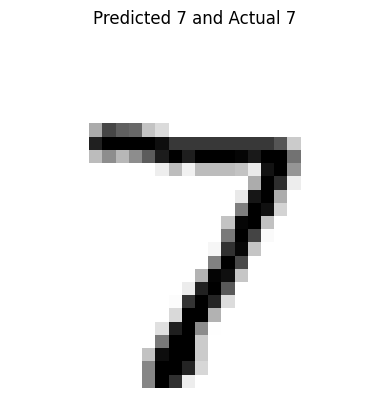

######################


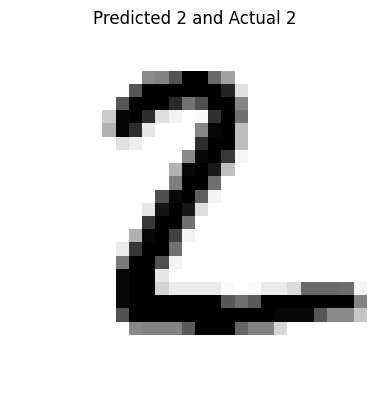

######################


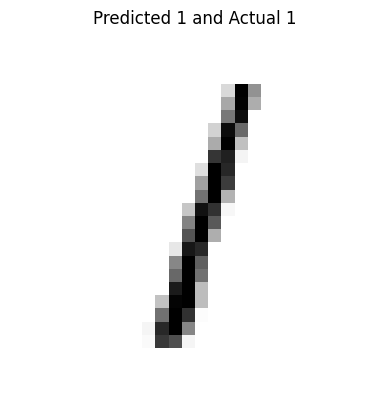

######################


In [36]:
# plot
for data, pred, actual_data in zip(X_new, y_pred, y_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")